In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [34]:
data = pd.read_excel('./data/data_ford_price.xlsx')

---

### Quantile transformer

In [35]:
train_data = data.copy()

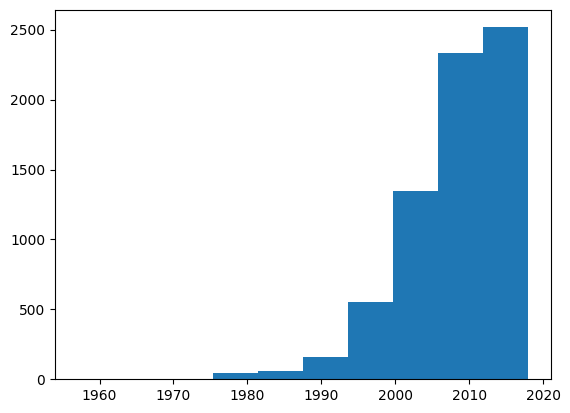

In [36]:
data_to_transform = train_data['year'].values.reshape(len(train_data), 1)
plt.hist(data_to_transform);

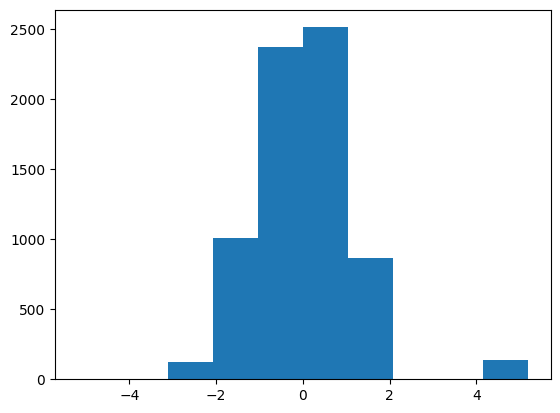

In [37]:
quantile = preprocessing.QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_to_transform)

plt.hist(data_transformed);


In [38]:
data_to_transform = train_data[['condition', 'cylinders']]

In [39]:
quantile = preprocessing.QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_to_transform)

In [55]:
[data_transformed[i][0] for i in range(len(data_transformed))][0].round(2)

0.96

---

### Logtransform

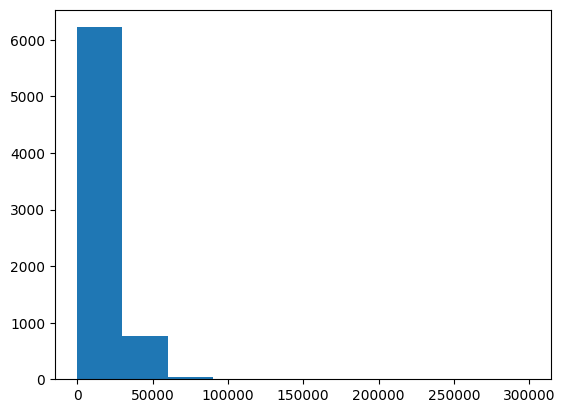

In [57]:
price = train_data['price']
plt.hist(price);

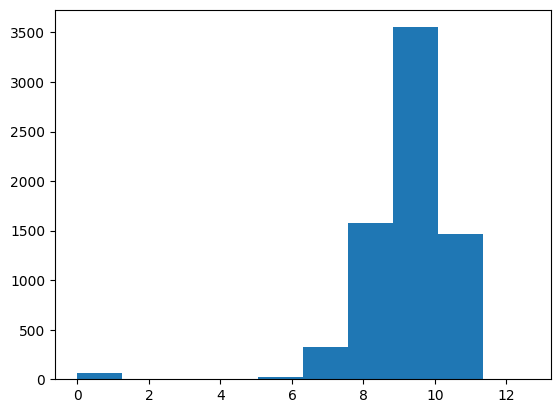

In [59]:
log_price = np.log(price)
plt.hist(log_price);

In [64]:
price_data = pd.DataFrame({'price': price, 'log_price': log_price})
price_data.describe()

,price,log_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


In [66]:
price_data.iloc[-1].round(2)

price        18000.0
log_price        9.8
Name: 7016, dtype: float64

---

### POWER TRANSFORMER SCALER

In [69]:
box_cox = preprocessing.PowerTransformer(method='box-cox')
data_box_cox =box_cox.fit_transform(train_data[['price', 'year']])
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

/Users/kirillkuznecov/opt/anaconda3/envs/ds/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/kirillkuznecov/opt/anaconda3/envs/ds/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


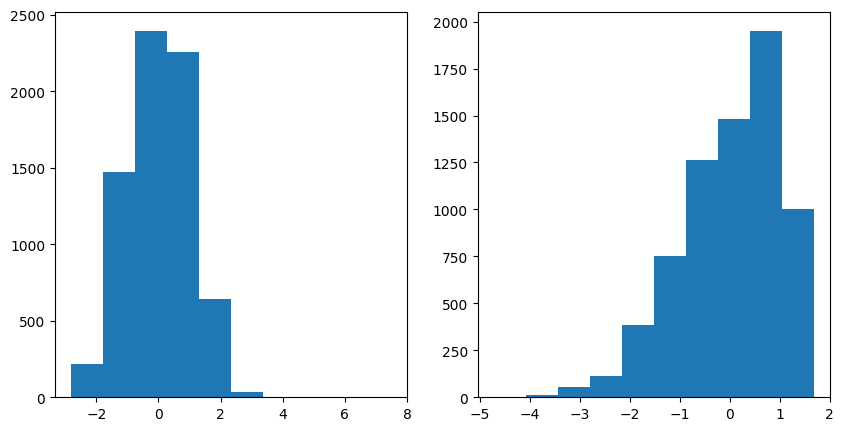

In [88]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
for i,g in enumerate(data_box_cox.columns):
    axes[i].hist(data_box_cox[g])

In [95]:
data = data[['price', 'year', 'cylinders',
             'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace=True)
y = data['price']
x = data.drop(columns='price')
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.3, random_state=30)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)


MAE: 4856.318


In [96]:
x.drop('lat', axis = 1, inplace = True)
mae = metrics.mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)


MAE: 4856.318
